# PANDAS






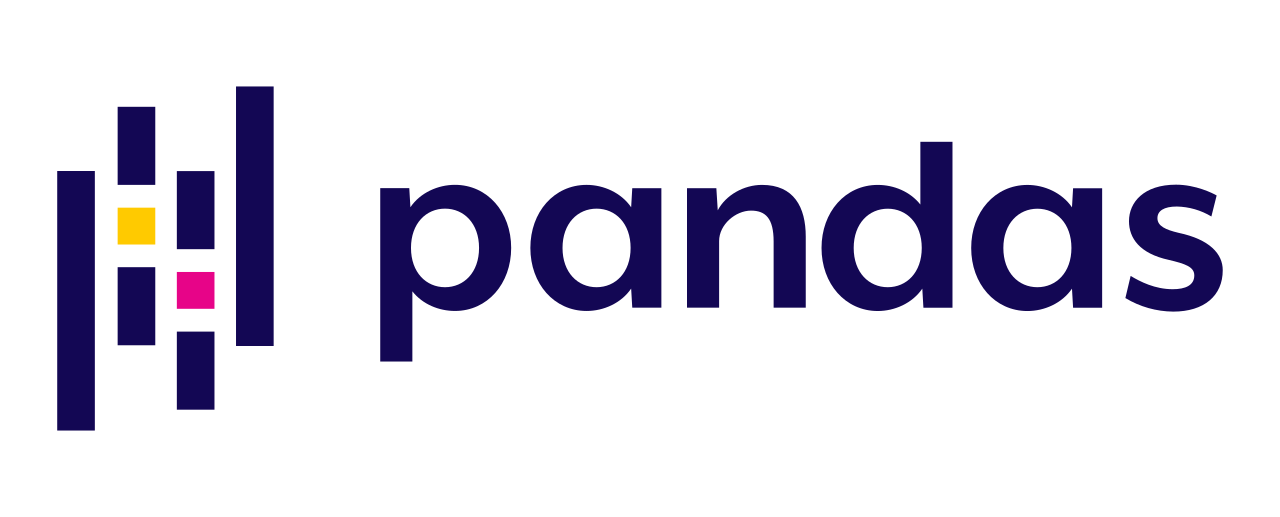

# **Introducción a Pandas**

**Pandas** es una librería de Python especializada en el m**anejo y análisis de estructuras de datos**. Es una herramienta potente, flexible y fácil de usar, que permite a los usuarios cargar, manipular y analizar datos de forma rápida y eficiente.

Pandas define dos estructuras de datos como las principales (más usadas):

* **Series:** Una serie es una estructura de datos unidimensional que representa un array o lista de datos (una fila/columna que extraigamos de una tabla)
* **DataFrames:** Un DataFrame es una estructura de datos bidimensional que representa una tabla de datos.



Para poder utilizar la librería, en primer lugar es necesario importarla:

In [1]:
# "pd" es el alias corto mundialmente utilizado
import pandas as pd

# NumPy nos va a hacer falta en algún momento
import numpy as np



\

# **Estructuras de datos en Pandas**




## **Series** <pd.Series()>


Una serie es una estructura de datos unidimensional que representa un array o lista de datos. Las series se pueden crear a partir de una lista, un rango o un diccionario.

Una **serie** es como un vector **unidimensional** con **etiquetas (índice)** que contiene unos datos **homogéneos (del mismo tipo)**. Lo podemos ver como una de las columnas que van a componer una tabla.

Veamoslo con ejemplos

In [ ]:
# a partir de una lista
mi_serie = pd.Series([1, 1, 2, 3, 5])

print(mi_serie)


0    1
1    1
2    2
3    3
4    5
dtype: int64


In [ ]:
notas = pd.Series([1.5, 3.5, 4.75])

print(notas)


0    1.50
1    3.50
2    4.75
dtype: float64


In [ ]:
type(notas)

pandas.core.series.Series

Si intentamos crear una serie con datos de diferentes tipos, podremos hacerlo, ya que pandas creará una serie con el tipo más general:


In [ ]:
# Mezclamos enteros y floats, la serie es de tipo float.
print(pd.Series([1, 2, 3.5]))

0    1.0
1    2.0
2    3.5
dtype: float64


In [ ]:
# Mezclamos enteros, floats y strings, la serie es de tipo object, para Python al final todo es un objeto
print(pd.Series([1, 4.3, "data"]))

0       1
1     4.3
2    data
dtype: object


Las Series disponen de **índice**, útil para etiquetar a la información y acceder a la misma. Si no lo especificamos crea uno de enteros (ver ejplos arriba la primera columna)

In [ ]:
notas

0    1.50
1    3.50
2    4.75
dtype: float64

In [ ]:
notas[2]

4.75

In [ ]:
# lo podemos especificar en el parámetro "index":

notas2 = pd.Series([5.6,2.7,8.3], index=['Pepe','Ana','María'])

notas2

Pepe     5.6
Ana      2.7
María    8.3
dtype: float64

In [ ]:
# o a partir de un diccionario, el índice lo forman las claves del mismo:
notas3 = pd.Series({'Paula': 5.6, 'Antonio': 7.25, 'Lola': 3.9})

notas3

Paula      5.60
Antonio    7.25
Lola       3.90
dtype: float64

In [ ]:
print(notas2['Ana'])

print(notas3['Antonio'])

2.7
7.25


In [ ]:
# el índice es un "atributo" de una serie, podemos obtenerlo
print(notas3.index)

Index(['Paula', 'Antonio', 'Lola'], dtype='object')


In [ ]:
notas3[2]

C:\Users\Alumnado\AppData\Local\Temp\ipykernel_9324\298854984.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  notas3[2]


3.9

In [ ]:
notas3.values

array([5.6 , 7.25, 3.9 ])

\


## **DataFrames** <pd.DataFrame()>

Un **DataFrame** es una **estructura de datos bidimensional** que representa una **tabla de datos**. El _dataframe_ es la estructura principal de trabajo con la librería pandas.

Los atributos principales de una tabla son el índice (frecuentemente definido sólo en determinados casos como las series temporales) y las columnas que lo forman.

Los DataFrames se pueden crear a partir de una lista de listas, un diccionario de listas, leyendo de un archivo de datos (lo veremos más adelante) o especificando el índice y las columnas.

In [ ]:
# mediante diccionario (las claves son los nombres de las columnas)

registro_trafico = pd.DataFrame({'tipo_vehiculo': ['turismo','furgoneta','motocicleta'],
                                 'n_pasajeros': [5,9,2],
                                 'color': ['rojo', 'azul', 'negro']})

registro_trafico

,tipo_vehiculo,n_pasajeros,color
0,turismo,5,rojo
1,furgoneta,9,azul
2,motocicleta,2,negro


In [ ]:
# especificando datos y columnas (pudieramos tb haberlo hecho con el índice)

registro_trafico2 = pd.DataFrame(data= [['turismo', 5, 'verde'], ['motocicleta',2,'gris']], columns=['tipo_vehiculo', 'n_pasajeros', 'color'])

registro_trafico2

,tipo_vehiculo,n_pasajeros,color
0,turismo,5,verde
1,motocicleta,2,gris


De nuevo las **columnas** son un **atributo del Dataframe**:



In [ ]:
registro_trafico.columns

Index(['tipo_vehiculo', 'n_pasajeros', 'color'], dtype='object')

Podemos **acceder a una columna o columnas** como estabamos acostumbrados con listas y arrays, **utilizando corchetes ([])**

In [ ]:
registro_trafico['tipo_vehiculo']

0        turismo
1      furgoneta
2    motocicleta
Name: tipo_vehiculo, dtype: object

In [ ]:
# para varias columnas entre corchetes interiores:

registro_trafico[['tipo_vehiculo','n_pasajeros']]


,tipo_vehiculo,n_pasajeros
0,turismo,5
1,furgoneta,9
2,motocicleta,2


Si el **nombre de una columna no contiene espacio** (buena práctica), se puede llamar como si fuera un atributo del dataframe, **con el punto (.) seguido del nombre de la columna**:


In [ ]:
registro_trafico.color

0     rojo
1     azul
2    negro
Name: color, dtype: object

Otro atributo al que podemos acceder es a los tipos de las columnas **dtypes**:

In [ ]:
registro_trafico.dtypes

tipo_vehiculo    object
n_pasajeros       int64
color            object
dtype: object

In [ ]:
type(registro_trafico.dtypes)

pandas.core.series.Series

\

A modo de comentario podemos ver como resultado siguiente la conexión dentro de las librerías de datos entre Pandas y Numpy. Para ello nos valemos de otro atributo: **"values"** que devuelve solo los valores (lo de "dentro" de la tabla)


In [ ]:
print(notas, '\n'*len(notas.index))

print(notas.values)

0    1.50
1    3.50
2    4.75
dtype: float64 



[1.5  3.5  4.75]


In [ ]:
type(notas.values)

numpy.ndarray

In [ ]:
print(registro_trafico, '\n'*2)

print(registro_trafico.values)



  tipo_vehiculo  n_pasajeros  color
0       turismo            5   rojo
1     furgoneta            9   azul
2   motocicleta            2  negro 


[['turismo' 5 'rojo']
 ['furgoneta' 9 'azul']
 ['motocicleta' 2 'negro']]


In [ ]:
print(type(registro_trafico.values))

print(registro_trafico.values.shape)


<class 'numpy.ndarray'>
(3, 3)


In [ ]:
# cuando seleccionamos una columna se nos devuelve como Serie

print(type(registro_trafico.color))

<class 'pandas.core.series.Series'>


In [ ]:
mi_df = pd.DataFrame(data= [['turismo', 5 , 'verde'], ['motocicleta', 2, 'gris']], columns=['tipo_vehiculo', 'n_pasajeros', 'color'])
mi_df

,tipo_vehiculo,n_pasajeros,color
0,turismo,5,verde
1,motocicleta,2,gris


\



# Lectura de datos desde un fichero.

Pandas proporciona una serie de funciones para leer datos de diferentes fuentes.

**Lectura de datos**

Pandas puede leer datos de una variedad de fuentes, incluyendo:

* Archivos CSV: *pd.read_csv()*           delimitador ","
* Archivos de texto: (muy común usar tambien read_csv) *pd.read_table()*    delimitador "\t"
* Archivos Excel: *pd.read_excel()*       especificar hoja(pestaña),columnas ...
* Otros formatos ...

Estos métodos disponen de multitud de parámetros para configurar con todo detalle cómo realizar la importación (siempre es buena idea echar un vistazo a la ayuda). Si bien para la mayoría de las ocasiones la configuración por defecto ya nos ofrecerá los resultados deseados.

Vamos a **cargar** como ejemplo el **archivo** **sales.csv**.

(NOTA: el archivo se encuentra en la plataforma, lo teneis que descargar primero a vuestro ordenador)


In [ ]:
# Cargamos los datos del fichero
ruta = './datos/sales.csv'

df_sales = pd.read_csv(ruta)

print(type(df_sales))

df_sales


<class 'pandas.core.frame.DataFrame'>


,Order_ID,Order_Date,Item_Type,Units_Sold,Unit_Price,Region,Country,Ship_Date
0,535113847,10/8/2014,Snacks,934,152.58,Middle East and North Africa,Azerbaijan,10/23/2014
1,874708545,2/22/2015,Cosmetics,4551,437.20,Central America and the Caribbean,Panama,2/27/2015
2,854349935,12/9/2015,Fruits,9986,9.33,Sub-Saharan Africa,Sao Tome and Principe,1/18/2016
3,892836844,9/17/2014,Personal Care,9118,81.73,Sub-Saharan Africa,Sao Tome and Principe,10/12/2014
4,129280602,2/4/2010,Household,5858,668.27,Central America and the Caribbean,Belize,3/5/2010
...,...,...,...,...,...,...,...,...
99995,836322486,8/26/2012,Cereal,5263,205.70,Sub-Saharan Africa,Niger,9/11/2012
99996,110449349,12/3/2013,Meat,3272,421.89,Europe,Poland,12/10/2013
99997,193128764,8/7/2013,Clothes,9948,109.28,Sub-Saharan Africa,Comoros,8/31/2013
99998,701597058,6/28/2011,Cosmetics,7015,437.20,Middle East and North Africa,Kuwait,7/3/2011


Vemos al final que tiene 100 mil registros (filas) y 8 columnas:

Aquí podemos ver como cargar los datos de otra manera, sin usar rutas de fichero:

In [3]:
!git clone https://github.com/SonikoKatsura/CURSO_PARO_IA.git

Cloning into 'CURSO_PARO_IA'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 26 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 2.52 MiB | 4.98 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [4]:
# Cargamos los datos del fichero
ruta = '/content/CURSO_PARO_IA/datos/sales.csv'

df_sales = pd.read_csv(ruta)

print(type(df_sales))

df_sales

<class 'pandas.core.frame.DataFrame'>


,Order_ID,Order_Date,Item_Type,Units_Sold,Unit_Price,Region,Country,Ship_Date
0,535113847,10/8/2014,Snacks,934,152.58,Middle East and North Africa,Azerbaijan,10/23/2014
1,874708545,2/22/2015,Cosmetics,4551,437.20,Central America and the Caribbean,Panama,2/27/2015
2,854349935,12/9/2015,Fruits,9986,9.33,Sub-Saharan Africa,Sao Tome and Principe,1/18/2016
3,892836844,9/17/2014,Personal Care,9118,81.73,Sub-Saharan Africa,Sao Tome and Principe,10/12/2014
4,129280602,2/4/2010,Household,5858,668.27,Central America and the Caribbean,Belize,3/5/2010
...,...,...,...,...,...,...,...,...
99995,836322486,8/26/2012,Cereal,5263,205.70,Sub-Saharan Africa,Niger,9/11/2012
99996,110449349,12/3/2013,Meat,3272,421.89,Europe,Poland,12/10/2013
99997,193128764,8/7/2013,Clothes,9948,109.28,Sub-Saharan Africa,Comoros,8/31/2013
99998,701597058,6/28/2011,Cosmetics,7015,437.20,Middle East and North Africa,Kuwait,7/3/2011


In [ ]:
# podemos tener las columnas en forma de lista  en vez de un objeto "Indice" (por defecto)
df_sales.columns.to_list()


['Order_ID',
 'Order_Date',
 'Item_Type',
 'Units_Sold',
 'Unit_Price',
 'Region',
 'Country',
 'Ship_Date']

**Cuestiones importantes a tener en cuenta:**

- Echar un vistazo a los datos preferiblemente en crudo, como texto plano (click boton dcho ---> Abrir con ...  Bloc de notas)
Con esto identificamos delimitador de columnas, si hay cabecera, si hay que saltar lineas de comentario....

- Elegir cual de los métodos (como mencionamos anteriormente) utilizar y en consecuencia del punto anterior los parámetros que debemos especificar para una lectura correcta.

Veamos un ejemplo con el archivo **"desordenado.txt"**

In [ ]:
df_desordenado = pd.read_table('./datos/desordenado.txt', \
                               skiprows=3, sep=";", header=None, names=['nro_planchas', 'grosor', 'largo', 'ancho'])

df_desordenado

,nro_planchas,grosor,largo,ancho
0,5,0.015,5,2
1,10,0.020,12,6
2,2,0.030,20,10


\

# Operaciones básicas

## Exploración del _dataframe_

Podemos ver las primeras o últimas filas (registros) de nuestro DF, mediante los métodos **head()** y **tail()** respectivamente. Podemos especificar entre paréntesis el número de filas:

In [ ]:
df_sales.head()

,Order_ID,Order_Date,Item_Type,Units_Sold,Unit_Price,Region,Country,Ship_Date
0,535113847,10/8/2014,Snacks,934,152.58,Middle East and North Africa,Azerbaijan,10/23/2014
1,874708545,2/22/2015,Cosmetics,4551,437.20,Central America and the Caribbean,Panama,2/27/2015
2,854349935,12/9/2015,Fruits,9986,9.33,Sub-Saharan Africa,Sao Tome and Principe,1/18/2016
3,892836844,9/17/2014,Personal Care,9118,81.73,Sub-Saharan Africa,Sao Tome and Principe,10/12/2014
4,129280602,2/4/2010,Household,5858,668.27,Central America and the Caribbean,Belize,3/5/2010


In [ ]:
df_sales.tail(3)

,Order_ID,Order_Date,Item_Type,Units_Sold,Unit_Price,Region,Country,Ship_Date
99997,193128764,8/7/2013,Clothes,9948,109.28,Sub-Saharan Africa,Comoros,8/31/2013
99998,701597058,6/28/2011,Cosmetics,7015,437.20,Middle East and North Africa,Kuwait,7/3/2011
99999,423403060,4/3/2012,Cosmetics,3229,437.20,Sub-Saharan Africa,Tanzania,4/30/2012


También tenemos la opción de obtener una muestra aleatoria, por ejemplo en tablas ordenadas para ver datos variados.

Utilizaremos el método **sample**, al que le tenemos que indicar bien el nº de filas (parámetro "n") o bien una fracción sobre el total (parámetro "frac", por ejemplo 0.5 para la mitad de la tabla):

In [ ]:
# fijaros en la visualización en los índices a la izquierda, muestra aleatoria

df_sales.sample(n=20)


,Order_ID,Order_Date,Item_Type,Units_Sold,Unit_Price,Region,Country,Ship_Date
31319,363936126,7/3/2014,Personal Care,5642,81.73,Central America and the Caribbean,Saint Vincent and the Grenadines,7/16/2014
4627,147970664,7/13/2017,Cereal,6663,205.70,Europe,Lithuania,7/18/2017
12987,584969031,4/16/2012,Personal Care,4191,81.73,Sub-Saharan Africa,Ghana,5/7/2012
65339,215443885,5/1/2010,Office Supplies,3488,651.21,Europe,Belgium,5/12/2010
3146,144664037,4/9/2014,Snacks,8158,152.58,Sub-Saharan Africa,Tanzania,5/4/2014
78451,722377097,6/18/2011,Fruits,6291,9.33,Central America and the Caribbean,Haiti,7/13/2011
76062,719449841,5/21/2015,Fruits,51,9.33,Asia,Myanmar,6/8/2015
15823,608543288,7/3/2015,Cereal,337,205.70,Central America and the Caribbean,Barbados,7/25/2015
5703,209461486,7/29/2013,Office Supplies,3163,651.21,Sub-Saharan Africa,Madagascar,8/18/2013
60037,736172664,5/6/2016,Household,8705,668.27,Middle East and North Africa,Afghanistan,6/5/2016


\

Disponemos también del método **"info"**, que nos da información de las filas (Index), columnas y su tipo, uso en memoria, no-nulos por columna:

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Order_ID    100000 non-null  int64  
 1   Order_Date  100000 non-null  object 
 2   Item_Type   100000 non-null  object 
 3   Units_Sold  100000 non-null  int64  
 4   Unit_Price  100000 non-null  float64
 5   Region      100000 non-null  object 
 6   Country     100000 non-null  object 
 7   Ship_Date   100000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.1+ MB


Otra opción es el método **describe()** que da un resumen estadístico de las columnas, si bien por defecto solo muestra la de las variables numéricas:

In [ ]:
df_sales.describe()

,Order_ID,Units_Sold,Unit_Price
count,1.000000e+05,100000.000000,100000.000000
mean,5.503956e+08,5001.446170,266.703989
std,2.593219e+08,2884.575424,216.940081
min,1.000089e+08,1.000000,9.330000
25%,3.260464e+08,2505.000000,109.280000
50%,5.477185e+08,5007.000000,205.700000
75%,7.750785e+08,7495.250000,437.200000
max,9.999965e+08,10000.000000,668.270000


Si bien podemos especificar en el **parámetro include** los tipos de las columnas de las que queremos esa información.

Así las columnas de tipo cadena (en pandas aparecen como "Object") alguna veces se corresponden con variables discretas, categóricas. Veamos la información que se muestra en este ejemplo.

In [ ]:
df_sales.columns

Index(['Order_ID', 'Order_Date', 'Item_Type', 'Units_Sold', 'Unit_Price',
       'Region', 'Country', 'Ship_Date'],
      dtype='object')

In [ ]:
df_sales.describe(include=[object])

,Order_Date,Item_Type,Region,Country,Ship_Date
count,100000,100000,100000,100000,100000
unique,2766,12,7,185,2813
top,11/27/2010,Office Supplies,Sub-Saharan Africa,Sudan,10/4/2015
freq,57,8426,26019,623,61


Podemos obtener **determinados valores de una columna tipo categórico** con los métodos **"unique"** y **"value_counts"**:

In [ ]:
# ¿cuantos regiones hay? ¿Cuales son?

df_sales.Region.unique()

array(['Middle East and North Africa',
       'Central America and the Caribbean', 'Sub-Saharan Africa',
       'Europe', 'Asia', 'Australia and Oceania', 'North America'],
      dtype=object)

In [ ]:
len(df_sales.Region.unique())

7

In [ ]:
# Nº de pedidos por Región, podemos ordenar con parámetro "ascending"

df_sales.Region.value_counts(ascending=False)

Region
Sub-Saharan Africa                   26019
Europe                               25877
Asia                                 14547
Middle East and North Africa         12580
Central America and the Caribbean    10731
Australia and Oceania                 8113
North America                         2133
Name: count, dtype: int64

In [ ]:
# con el parámetro "normalize" nos devuelve proporción, y de ahi podemos obtener porcentaje:

df_sales.Region.value_counts(normalize=True)

Region
Sub-Saharan Africa                   0.26019
Europe                               0.25877
Asia                                 0.14547
Middle East and North Africa         0.12580
Central America and the Caribbean    0.10731
Australia and Oceania                0.08113
North America                        0.02133
Name: proportion, dtype: float64

In [ ]:
df_sales.Region.value_counts(normalize=True) * 100

Region
Sub-Saharan Africa                   26.019
Europe                               25.877
Asia                                 14.547
Middle East and North Africa         12.580
Central America and the Caribbean    10.731
Australia and Oceania                 8.113
North America                         2.133
Name: proportion, dtype: float64

\

## Indexación y selección de datos


**Podemos utilizar las expresiones habituales de Python (y NumPy)** para seleccionar datos de _dataframes_ **o bien usar los operadores propios de pandas**. Estos últimos están optimizados, por lo que su uso es recomendado para trabajar con conjuntos de datos grandes o en situaciones donde la eficiencia sea crítica.

### **Expresiones comunes**

In [ ]:
# Primero seleccionamos las columnas como ya sabemos, despues especificamos
# un rango de filas

df_sales[['Item_Type','Units_Sold','Country']][0:5]

,Item_Type,Units_Sold,Country
0,Snacks,934,Azerbaijan
1,Cosmetics,4551,Panama
2,Fruits,9986,Sao Tome and Principe
3,Personal Care,9118,Sao Tome and Principe
4,Household,5858,Belize


O podemos utilizar **indexado lógico, especificando la condición que deben cumplir las filas a recuperar** (se puede a continuación elegir igual que antes las columnas):

**OJO: para condiciones compuestas emplear (&) para "and", (|) para "or" y la virulilla (~) para "not"**

In [ ]:
df_sales[(df_sales.Country=="Belize") & (df_sales.Units_Sold>5000)][['Country','Item_Type','Units_Sold']]

,Country,Item_Type,Units_Sold
4,Belize,Household,5858
462,Belize,Office Supplies,7334
479,Belize,Household,8343
496,Belize,Baby Food,7630
749,Belize,Clothes,9632
...,...,...,...
97059,Belize,Cereal,8132
97391,Belize,Fruits,9819
97813,Belize,Vegetables,8498
97935,Belize,Cosmetics,8851


\

### **Operadores propios**: "loc[]"; "iloc[]"

Con **"loc[ ]"** podemos especificar filas (si hay definido índice y si no numérico) y columnas por su nombre directamente. Podemos también especificar rangos o solo determinados valores (entre corchetes) para esas filas y columnas, y también indexado lógico. Es una **opción más completa**:

In [ ]:
# una celda determinada

df_sales.loc[100, 'Region']

'Sub-Saharan Africa'

In [ ]:
# un rango de filas y determinadas columnas

df_sales.loc[:10,['Country', 'Units_Sold']]

,Country,Units_Sold
0,Azerbaijan,934
1,Panama,4551
2,Sao Tome and Principe,9986
3,Sao Tome and Principe,9118
4,Belize,5858
5,Denmark,1149
6,Germany,7964
7,Turkey,6307
8,United Kingdom,8217
9,Kazakhstan,2758


In [ ]:
df_sales.columns

Index(['Order_ID', 'Order_Date', 'Item_Type', 'Units_Sold', 'Unit_Price',
       'Region', 'Country', 'Ship_Date'],
      dtype='object')

In [ ]:
df_sales.loc[:5,'Item_Type':'Region']

,Item_Type,Units_Sold,Unit_Price,Region
0,Snacks,934,152.58,Middle East and North Africa
1,Cosmetics,4551,437.20,Central America and the Caribbean
2,Fruits,9986,9.33,Sub-Saharan Africa
3,Personal Care,9118,81.73,Sub-Saharan Africa
4,Household,5858,668.27,Central America and the Caribbean
5,Clothes,1149,109.28,Europe


In [ ]:
# especificar una condición para las filas (registros) a recuperar

df_sales.loc[(df_sales.Region=='Asia') & (df_sales.Units_Sold<10),:]

,Order_ID,Order_Date,Item_Type,Units_Sold,Unit_Price,Region,Country,Ship_Date
13908,219183099,5/3/2010,Meat,5,421.89,Asia,South Korea,6/7/2010
16459,785311591,5/29/2010,Cereal,6,205.70,Asia,Kazakhstan,6/14/2010
19347,693936240,10/17/2010,Cereal,9,205.70,Asia,North Korea,11/10/2010
29965,851477611,7/20/2010,Vegetables,2,154.06,Asia,Vietnam,8/25/2010
30280,834412324,4/27/2015,Baby Food,4,255.28,Asia,South Korea,5/30/2015
44128,503953874,12/3/2012,Baby Food,5,255.28,Asia,South Korea,1/8/2013
47211,844651496,6/27/2015,Office Supplies,3,651.21,Asia,Singapore,8/11/2015
53866,572485387,6/3/2016,Fruits,3,9.33,Asia,North Korea,6/8/2016
58368,925787675,12/8/2014,Baby Food,1,255.28,Asia,Kazakhstan,1/3/2015
78916,189513146,8/1/2011,Snacks,6,152.58,Asia,China,8/21/2011


Con **"iloc[ ]"** solo podemos utilizar números (valor, rangos, listas) para indicar las filas y columnas (numeradas por orden de aparición en el DF):

In [ ]:
df_sales.head(10)

,Order_ID,Order_Date,Item_Type,Units_Sold,Unit_Price,Region,Country,Ship_Date
0,535113847,10/8/2014,Snacks,934,152.58,Middle East and North Africa,Azerbaijan,10/23/2014
1,874708545,2/22/2015,Cosmetics,4551,437.20,Central America and the Caribbean,Panama,2/27/2015
2,854349935,12/9/2015,Fruits,9986,9.33,Sub-Saharan Africa,Sao Tome and Principe,1/18/2016
3,892836844,9/17/2014,Personal Care,9118,81.73,Sub-Saharan Africa,Sao Tome and Principe,10/12/2014
4,129280602,2/4/2010,Household,5858,668.27,Central America and the Caribbean,Belize,3/5/2010
5,473105037,2/20/2013,Clothes,1149,109.28,Europe,Denmark,2/28/2013
6,754046475,3/31/2013,Cosmetics,7964,437.20,Europe,Germany,5/3/2013
7,772153747,3/26/2012,Fruits,6307,9.33,Middle East and North Africa,Turkey,4/7/2012
8,847788178,12/29/2012,Snacks,8217,152.58,Europe,United Kingdom,1/15/2013
9,471623599,9/11/2015,Cosmetics,2758,437.20,Asia,Kazakhstan,9/18/2015


In [ ]:
# una celda
df_sales.iloc[4,2]


'Household'

In [ ]:
# filas por rango y columnas por lista (todo numeros)

df_sales.iloc[0:5,[2,3,5]]


,Item_Type,Units_Sold,Region
0,Snacks,934,Middle East and North Africa
1,Cosmetics,4551,Central America and the Caribbean
2,Fruits,9986,Sub-Saharan Africa
3,Personal Care,9118,Sub-Saharan Africa
4,Household,5858,Central America and the Caribbean


\

# Manipulación de datos: Transformación

## Operaciones básicas de columna

Podemos **asignar valores a las columnas** (coherentes con su longitud). Para **crear una columna nueva** basta con especificar el nombre de la nueva columna y asignar un valor:

In [ ]:
df_desordenado

,nro_planchas,grosor,largo,ancho
0,5,0.015,5,2
1,10,0.020,12,6
2,2,0.030,20,10


In [ ]:
# creamos (añadimos) nueva columna
df_desordenado['Enviado'] = [True, False, True]

df_desordenado

,nro_planchas,grosor,largo,ancho,Enviado
0,5,0.015,5,2,True
1,10,0.020,12,6,False
2,2,0.030,20,10,True


In [ ]:
df_desordenado['superficie'] = df_desordenado.largo * df_desordenado.ancho

df_desordenado

,nro_planchas,grosor,largo,ancho,Enviado,superficie
0,5,0.015,5,2,True,10
1,10,0.020,12,6,False,72
2,2,0.030,20,10,True,200


La nueva columna puede ser también resultado de un campo calculado a partir de otra u otras columnas. Lo veremos más adelante.

\

Con el método **"drop"** podemos eliminir una columna o columnas (podemos también eliminar filas).

Un parámetro a tener en cuenta es **"inplace"** (booleano, presente también en otros métodos), que realiza la modificación en el propio DF y no devuelve ningún valor (True). Para (False), valor por defecto, deja intacto el DF original y devuelve uno con la modificación:

In [ ]:
# comportamiento parámetro "inplace" False (por defecto)
df_resumen = df_desordenado.drop(columns=['Enviado'])

df_resumen

,nro_planchas,grosor,largo,ancho,superficie
0,5,0.015,5,2,10
1,10,0.020,12,6,72
2,2,0.030,20,10,200


In [ ]:
df_desordenado

,nro_planchas,grosor,largo,ancho,Enviado,superficie
0,5,0.015,5,2,True,10
1,10,0.020,12,6,False,72
2,2,0.030,20,10,True,200


In [ ]:
df_desordenado.drop(columns=['Enviado'], inplace=True)

df_desordenado

,nro_planchas,grosor,largo,ancho,superficie
0,5,0.015,5,2,10
1,10,0.020,12,6,72
2,2,0.030,20,10,200


Podemos también cambiar el tipo de dato de una columna (método Series) o columnas (método Dataframe) con el método **"astype"**. Podemos especificar un tipo de datos de Python o de [numpy.dtype](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html).

Este método por defecto devuelve una copia.

In [ ]:
# echemos un vistazo a los tipos de las columnas
df_desordenado.dtypes



nro_planchas      int64
grosor          float64
largo             int64
ancho             int64
superficie        int64
dtype: object

In [ ]:
# por los datos iniciales pandas "dedujo" que el largo y el ancho eran enteros
# lo mas correcto es pasarlo a decimal (float)
# especificamos columna y nuevo tipo como elementos de un diccionario

df_conversion = df_desordenado.astype({'largo': float, 'ancho': float})

df_conversion.dtypes


nro_planchas      int64
grosor          float64
largo           float64
ancho           float64
superficie        int64
dtype: object

\

## Operaciones básicas de fila

Para **añadir una fila o filas** recurrimos al método de pandas **"concat"**, creando primero un DF con la fila o filas a añadir para al final unirlo al original.

Es interesante señalar que con el valor por defecto (0) para el parámetro "axis" añadimos filas, pero de forma similar a lo explicado podemos añadir columnas si asignamos un (1).

Volviendo a nuestro caso de añadir filas:

In [ ]:
df_desordenado

,nro_planchas,grosor,largo,ancho,superficie
0,5,0.015,5,2,10
1,10,0.020,12,6,72
2,2,0.030,20,10,200


In [ ]:
df_nuevos = pd.DataFrame([[20, 0.010, 3, 3, 9], [5, 0.020, 15, 8, 120], [1, 0.030, 18, 15, 452]],
                         columns=['nro_planchas', 'grosor', 'largo', 'ancho', 'superficie'])

df_planchas_act = pd.concat([df_desordenado,df_nuevos], ignore_index=True)

df_planchas_act

,nro_planchas,grosor,largo,ancho,superficie
0,5,0.015,5,2,10
1,10,0.020,12,6,72
2,2,0.030,20,10,200
3,20,0.010,3,3,9
4,5,0.020,15,8,120
5,1,0.030,18,15,452


\

Para borrar filas nos valemos del método ya conocido **"drop"**, especificando el nº (indice, parámetro "index") de aquellas filas que queremos eliminar.

In [ ]:
# podemos borrar filas identificandolas por el índice:

df_planchas_act.drop(index=[3], inplace=True)

df_planchas_act

,nro_planchas,grosor,largo,ancho,superficie
0,5,0.015,5,2,10
1,10,0.020,12,6,72
2,2,0.030,20,10,200
4,5,0.020,15,8,120
5,1,0.030,18,15,452


A veces queremos **borrar filas que cumplan una condición**. Para ello debemos primero seleccionarlas (indexado lógico) y luego usar el método "index" del resultado como entrada de "drop" (parámetro del mismo nombre)

In [ ]:
# eliminar los registros de planchas de 0.030
# primer paso

idx = df_planchas_act[df_planchas_act.grosor==0.030].index

idx


Index([2, 5], dtype='int64')

In [ ]:
# finalmente

df_planchas_act.drop(index=idx, inplace=True)

df_planchas_act


,nro_planchas,grosor,largo,ancho,superficie
0,5,0.015,5,2,10
1,10,0.020,12,6,72
4,5,0.020,15,8,120


In [ ]:
df_planchas_act.reset_index()

,index,nro_planchas,grosor,largo,ancho,superficie
0,0,5,0.015,5,2,10
1,1,10,0.020,12,6,72
2,4,5,0.020,15,8,120


\

## Cálculos con columnas

Podemos realizar **operaciones aritmeticas con una columna o entre columnas**, así como utilizar métodos de **numpy**.

Es frecuente crear otra columna del DF con el resultado de estas operaciones (**campos calculados**):



In [ ]:
# por ejemplo si queremos pasar el grosor a cm.

df_planchas_act.grosor = df_planchas_act.grosor * 100

df_planchas_act


,nro_planchas,grosor,largo,ancho,superficie
0,5,1.5,5,2,10
1,10,2.0,12,6,72
4,5,2.0,15,8,120


Volvemos al DF "sales":


In [ ]:
df_sales

,Order_ID,Order_Date,Item_Type,Units_Sold,Unit_Price,Region,Country,Ship_Date
0,535113847,10/8/2014,Snacks,934,152.58,Middle East and North Africa,Azerbaijan,10/23/2014
1,874708545,2/22/2015,Cosmetics,4551,437.20,Central America and the Caribbean,Panama,2/27/2015
2,854349935,12/9/2015,Fruits,9986,9.33,Sub-Saharan Africa,Sao Tome and Principe,1/18/2016
3,892836844,9/17/2014,Personal Care,9118,81.73,Sub-Saharan Africa,Sao Tome and Principe,10/12/2014
4,129280602,2/4/2010,Household,5858,668.27,Central America and the Caribbean,Belize,3/5/2010
...,...,...,...,...,...,...,...,...
99995,836322486,8/26/2012,Cereal,5263,205.70,Sub-Saharan Africa,Niger,9/11/2012
99996,110449349,12/3/2013,Meat,3272,421.89,Europe,Poland,12/10/2013
99997,193128764,8/7/2013,Clothes,9948,109.28,Sub-Saharan Africa,Comoros,8/31/2013
99998,701597058,6/28/2011,Cosmetics,7015,437.20,Middle East and North Africa,Kuwait,7/3/2011


Podemos crear un campo calculado (columna) **Total_Price** mediante las columnas "Units_Sold" y "Unit_Price":

In [ ]:
df_sales['Total_Price'] = df_sales['Units_Sold'] * df_sales['Unit_Price']

df_sales

,Order_ID,Order_Date,Item_Type,Units_Sold,Unit_Price,Region,Country,Ship_Date,Total_Price
0,535113847,10/8/2014,Snacks,934,152.58,Middle East and North Africa,Azerbaijan,10/23/2014,142509.72
1,874708545,2/22/2015,Cosmetics,4551,437.20,Central America and the Caribbean,Panama,2/27/2015,1989697.20
2,854349935,12/9/2015,Fruits,9986,9.33,Sub-Saharan Africa,Sao Tome and Principe,1/18/2016,93169.38
3,892836844,9/17/2014,Personal Care,9118,81.73,Sub-Saharan Africa,Sao Tome and Principe,10/12/2014,745214.14
4,129280602,2/4/2010,Household,5858,668.27,Central America and the Caribbean,Belize,3/5/2010,3914725.66
...,...,...,...,...,...,...,...,...,...
99995,836322486,8/26/2012,Cereal,5263,205.70,Sub-Saharan Africa,Niger,9/11/2012,1082599.10
99996,110449349,12/3/2013,Meat,3272,421.89,Europe,Poland,12/10/2013,1380424.08
99997,193128764,8/7/2013,Clothes,9948,109.28,Sub-Saharan Africa,Comoros,8/31/2013,1087117.44
99998,701597058,6/28/2011,Cosmetics,7015,437.20,Middle East and North Africa,Kuwait,7/3/2011,3066958.00


Y calcular a modo de exploración la media de esta nueva columna:

In [ ]:
np.mean(df_sales.Total_Price)

1336066.7306641003

\

In [ ]:
df_sales.columns


Index(['Order_ID', 'Order_Date', 'Item_Type', 'Units_Sold', 'Unit_Price',
       'Region', 'Country', 'Ship_Date', 'Total_Price'],
      dtype='object')

In [ ]:
df_sales['etiqueta'] = df_sales.Region + '_' + df_sales.Country

df_sales.head()

,Order_ID,Order_Date,Item_Type,Units_Sold,Unit_Price,Region,Country,Ship_Date,Total_Price,etiqueta
0,535113847,10/8/2014,Snacks,934,152.58,Middle East and North Africa,Azerbaijan,10/23/2014,142509.72,Middle East and North Africa_Azerbaijan
1,874708545,2/22/2015,Cosmetics,4551,437.20,Central America and the Caribbean,Panama,2/27/2015,1989697.20,Central America and the Caribbean_Panama
2,854349935,12/9/2015,Fruits,9986,9.33,Sub-Saharan Africa,Sao Tome and Principe,1/18/2016,93169.38,Sub-Saharan Africa_Sao Tome and Principe
3,892836844,9/17/2014,Personal Care,9118,81.73,Sub-Saharan Africa,Sao Tome and Principe,10/12/2014,745214.14,Sub-Saharan Africa_Sao Tome and Principe
4,129280602,2/4/2010,Household,5858,668.27,Central America and the Caribbean,Belize,3/5/2010,3914725.66,Central America and the Caribbean_Belize


## Métodos "apply" y "applymap"

Los métodos **"apply" y "applymap"** nos sirven para poder aplicar funciones sobre una columna o columnas o un Dataframe.

### Apply()

El método **`apply`** se utiliza para **aplicar una FUNCIÓN a los elementos de un DataFrame o una Serie** (se aplica a las filas o columnas, especificando parámetro "axis", por defecto a las columnas).

La **función** puede ser c**ualquier función Python que tome como entrada una Serie (fila o columna) y devuelva un solo valor (simple/compuesto) como salida**.

El método `apply` tiene dos argumentos obligatorios:

* `func`: Una función Python que se aplicará a los elementos del DataFrame o la Serie.
* `axis`: Un entero que indica el eje a lo largo del cual se aplicará la función. Los valores posibles son 0 (columnas) y 1 (filas).

El método `apply` devuelve un DataFrame o una Serie con los resultados de la función aplicada a los elementos. Veamoslo con ejemplos:




In [ ]:
# Nos creamos un dataframe de columnas numéricas con valores al azar
# sobre alumnos de un curso de bachillerato

np.random.seed(42)

datos_alumnos = pd.DataFrame({'altura': np.random.normal(175,8, size=5),
                              'peso': np.random.normal(80,5, size=5)})

datos_alumnos

,altura,peso
0,178.973713,78.829315
1,173.893886,87.896064
2,180.181508,83.837174
3,187.184239,77.652628
4,173.126773,82.712800


Primero queremos dejar todas las medidas con un solo decimal (aplicar la operación a todas las columnas):


In [ ]:
# OJO: "np.round" aparte del numero a redondear (aqui los de cada columna)
# tiene el parámetro "decimals" para especificar el nº de decimales

datos_redondeados = datos_alumnos.apply(np.round, decimals=1)

In [ ]:
datos_redondeados

,altura,peso
0,179.0,78.8
1,173.9,87.9
2,180.2,83.8
3,187.2,77.7
4,173.1,82.7


Lo pensamos mejor y queremos la altura en metros en vez de centímetros, con dos decimales.

In [ ]:
# son varias operaciones, tendremos que construirnos una función

def conversion_altura(serie):
  serie = serie / 100
  salida = np.round(serie, decimals=2)
  return salida



In [ ]:
# ahora la "aplicamos" a la altura

datos_redondeados.altura = datos_redondeados.altura.apply(conversion_altura)

datos_redondeados


,altura,peso
0,1.79,78.8
1,1.74,87.9
2,1.80,83.8
3,1.87,77.7
4,1.73,82.7


Ahora que tenemos la altura en metros y el peso en kg, podríamos calcular el Índice de Masa Corporal (IMC): IMC = peso (kg)/ [estatura (m)]^2.

Esta vez aplicaríamos una función a las filas (axis = 1):


In [ ]:
# creamos la función:

def calculo_IMC(serie):
  imc = serie[1] / (serie[0])**2

  return np.round(imc,1)


In [ ]:
datos_redondeados.apply(calculo_IMC, axis=1)


C:\Users\Alumnado\AppData\Local\Temp\ipykernel_9324\585555886.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  imc = serie[1] / (serie[0])**2


0    24.6
1    29.0
2    25.9
3    22.2
4    27.6
dtype: float64

Podemos añadirla como columna al DF:

In [ ]:
datos_redondeados['IMC'] = datos_redondeados.apply(calculo_IMC, axis=1)

datos_redondeados

C:\Users\Alumnado\AppData\Local\Temp\ipykernel_9324\585555886.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  imc = serie[1] / (serie[0])**2


,altura,peso,IMC
0,1.79,78.8,24.6
1,1.74,87.9,29.0
2,1.80,83.8,25.9
3,1.87,77.7,22.2
4,1.73,82.7,27.6


In [ ]:
df_sales.columns

Index(['Order_ID', 'Order_Date', 'Item_Type', 'Units_Sold', 'Unit_Price',
       'Region', 'Country', 'Ship_Date', 'Total_Price', 'etiqueta'],
      dtype='object')

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Order_ID     100000 non-null  int64  
 1   Order_Date   100000 non-null  object 
 2   Item_Type    100000 non-null  object 
 3   Units_Sold   100000 non-null  int64  
 4   Unit_Price   100000 non-null  float64
 5   Region       100000 non-null  object 
 6   Country      100000 non-null  object 
 7   Ship_Date    100000 non-null  object 
 8   Total_Price  100000 non-null  float64
 9   etiqueta     100000 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 7.6+ MB


In [ ]:
# una variante, pongo como parámetro el % de impuesto, es decir si "4%" le paso como parámetro "4"
def igic_apply(serie, imp):
    return serie * (1+imp/100)


In [ ]:
df_sales.Unit_Price.apply(igic_apply, imp=10)

0        167.838
1        480.920
2         10.263
3         89.903
4        735.097
          ...   
99995    226.270
99996    464.079
99997    120.208
99998    480.920
99999    480.920
Name: Unit_Price, Length: 100000, dtype: float64

In [ ]:
# más sencillo, sabemos el impuesto (no cambia), en este caso 7%, por lo que un incremento lo obtengo multiplicando por 1.07
# devuelvo el resultado redondeado a 2 decimales (centimos)

def igic_apply2(serie):
    imp = serie * 1.07
    return np.round(imp,2)



In [ ]:
df_sales.Unit_Price.apply(igic_apply2)

0        163.26
1        467.80
2          9.98
3         87.45
4        715.05
          ...  
99995    220.10
99996    451.42
99997    116.93
99998    467.80
99999    467.80
Name: Unit_Price, Length: 100000, dtype: float64

\

### Applymap()

El método **`applymap`** se utiliza para **aplicar una FUNCIÓN a los ELEMENTOS de un DataFrame.** La función debe tomar un solo valor como entrada y devolver un único valor como salida.

El método `applymap` tiene un solo argumento obligatorio:

* `func`: Una función Python que se aplicará a los elementos del DataFrame.

El método `applymap` devuelve un DataFrame con los resultados de la función aplicada a los elementos.

In [ ]:
# creamos un DF de numeros en un rango

df_ejemplo = pd.DataFrame({'A': [1,4,9], 'B': [64,81,100]})

df_ejemplo

,A,B
0,1,64
1,4,81
2,9,100


Queremos sus raices cuadradas:

In [ ]:
df_ejemplo.applymap(np.sqrt)

C:\Users\Alumnado\AppData\Local\Temp\ipykernel_9324\1581559258.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_ejemplo.applymap(np.sqrt)


,A,B
0,1.0,8.0
1,2.0,9.0
2,3.0,10.0


\

## Ordenar una Serie o Dataframe

El método **`sort_values()`** se utiliza para ordenar los valores de una Serie o DataFrame.

La diferencia consiste en que **para un Dataframe**, el método `sort_values()` ordena los valores de la Serie de acuerdo con lo establecido en el parámetro `by` (columnas). **Para una Serie** simplemente ordena sus valores.

El parámetro `ascending` especifica si los valores se deben ordenar en orden ascendente (`True`) o descendente (`False`). También dispone de parámetro "inplace".

Veamos algunos ejemplos con nuestro dataframe "sales". Para notar mejor el efecto trabajaremos sobre una muestra:


In [ ]:
sales_muestra = df_sales.sample(n=20, random_state=42)

sales_muestra

,Order_ID,Order_Date,Item_Type,Units_Sold,Unit_Price,Region,Country,Ship_Date,Total_Price,etiqueta
75721,251869571,11/13/2010,Vegetables,2658,154.06,North America,United States of America,11/30/2010,409491.48,North America_United States of America
80184,741131532,1/5/2012,Cereal,6145,205.70,Europe,Cyprus,1/15/2012,1264026.50,Europe_Cyprus
19864,274912965,5/22/2011,Beverages,1710,47.45,Sub-Saharan Africa,Eritrea,5/25/2011,81139.50,Sub-Saharan Africa_Eritrea
76699,534528052,10/24/2013,Clothes,7584,109.28,Sub-Saharan Africa,Eritrea,12/11/2013,828779.52,Sub-Saharan Africa_Eritrea
92991,167710006,9/11/2012,Household,7972,668.27,Australia and Oceania,Australia,10/17/2012,5327448.44,Australia and Oceania_Australia
76434,235881459,1/13/2016,Meat,1420,421.89,Sub-Saharan Africa,Burundi,2/22/2016,599083.80,Sub-Saharan Africa_Burundi
84004,551169335,5/16/2010,Household,2109,668.27,Europe,Greece,6/7/2010,1409381.43,Europe_Greece
80917,779191005,6/6/2017,Cereal,8789,205.70,Sub-Saharan Africa,Eritrea,6/7/2017,1807897.30,Sub-Saharan Africa_Eritrea
60767,391625106,11/24/2012,Cosmetics,9426,437.20,Europe,Netherlands,1/13/2013,4121047.20,Europe_Netherlands
50074,257088506,10/6/2014,Personal Care,7057,81.73,Asia,Indonesia,10/14/2014,576768.61,Asia_Indonesia


In [ ]:
# vamos a ordenar por unidades vendidas descendente:

sales_muestra.sort_values(by='Units_Sold', ascending=False)

,Order_ID,Order_Date,Item_Type,Units_Sold,Unit_Price,Region,Country,Ship_Date,Total_Price,etiqueta
60767,391625106,11/24/2012,Cosmetics,9426,437.20,Europe,Netherlands,1/13/2013,4121047.20,Europe_Netherlands
16638,553322827,5/23/2014,Beverages,9376,47.45,Europe,Vatican City,6/24/2014,444891.20,Europe_Vatican City
1761,383715808,4/9/2017,Office Supplies,8889,651.21,Middle East and North Africa,Syria,5/22/2017,5788605.69,Middle East and North Africa_Syria
80917,779191005,6/6/2017,Cereal,8789,205.70,Sub-Saharan Africa,Eritrea,6/7/2017,1807897.30,Sub-Saharan Africa_Eritrea
92991,167710006,9/11/2012,Household,7972,668.27,Australia and Oceania,Australia,10/17/2012,5327448.44,Australia and Oceania_Australia
76699,534528052,10/24/2013,Clothes,7584,109.28,Sub-Saharan Africa,Eritrea,12/11/2013,828779.52,Sub-Saharan Africa_Eritrea
50074,257088506,10/6/2014,Personal Care,7057,81.73,Asia,Indonesia,10/14/2014,576768.61,Asia_Indonesia
27701,620562160,7/1/2010,Vegetables,6988,154.06,Asia,Nepal,7/17/2010,1076571.28,Asia_Nepal
42141,709705913,7/9/2011,Household,6606,668.27,Central America and the Caribbean,El Salvador,8/4/2011,4414591.62,Central America and the Caribbean_El Salvador
88702,837374341,6/8/2013,Office Supplies,6531,651.21,Europe,Finland,7/22/2013,4253052.51,Europe_Finland


In [ ]:
# podemos ordenar por más de un campo, especificandolos entre corchetes:

sales_muestra.sort_values(by=['Region','Country'])

,Order_ID,Order_Date,Item_Type,Units_Sold,Unit_Price,Region,Country,Ship_Date,Total_Price,etiqueta
50074,257088506,10/6/2014,Personal Care,7057,81.73,Asia,Indonesia,10/14/2014,576768.61,Asia_Indonesia
27701,620562160,7/1/2010,Vegetables,6988,154.06,Asia,Nepal,7/17/2010,1076571.28,Asia_Nepal
149,777927577,11/29/2011,Meat,4912,421.89,Asia,Uzbekistan,12/29/2011,2072323.68,Asia_Uzbekistan
92991,167710006,9/11/2012,Household,7972,668.27,Australia and Oceania,Australia,10/17/2012,5327448.44,Australia and Oceania_Australia
63120,710297715,8/22/2012,Baby Food,1733,255.28,Australia and Oceania,New Zealand,9/25/2012,442400.24,Australia and Oceania_New Zealand
42141,709705913,7/9/2011,Household,6606,668.27,Central America and the Caribbean,El Salvador,8/4/2011,4414591.62,Central America and the Caribbean_El Salvador
80184,741131532,1/5/2012,Cereal,6145,205.70,Europe,Cyprus,1/15/2012,1264026.50,Europe_Cyprus
88702,837374341,6/8/2013,Office Supplies,6531,651.21,Europe,Finland,7/22/2013,4253052.51,Europe_Finland
84004,551169335,5/16/2010,Household,2109,668.27,Europe,Greece,6/7/2010,1409381.43,Europe_Greece
60767,391625106,11/24/2012,Cosmetics,9426,437.20,Europe,Netherlands,1/13/2013,4121047.20,Europe_Netherlands


In [ ]:
# y atendiendo a distintos criterios:

sales_muestra.sort_values(by=['Country', 'Units_Sold'], ascending=[True, False])

,Order_ID,Order_Date,Item_Type,Units_Sold,Unit_Price,Region,Country,Ship_Date,Total_Price,etiqueta
92991,167710006,9/11/2012,Household,7972,668.27,Australia and Oceania,Australia,10/17/2012,5327448.44,Australia and Oceania_Australia
76434,235881459,1/13/2016,Meat,1420,421.89,Sub-Saharan Africa,Burundi,2/22/2016,599083.80,Sub-Saharan Africa_Burundi
80184,741131532,1/5/2012,Cereal,6145,205.70,Europe,Cyprus,1/15/2012,1264026.50,Europe_Cyprus
42141,709705913,7/9/2011,Household,6606,668.27,Central America and the Caribbean,El Salvador,8/4/2011,4414591.62,Central America and the Caribbean_El Salvador
80917,779191005,6/6/2017,Cereal,8789,205.70,Sub-Saharan Africa,Eritrea,6/7/2017,1807897.30,Sub-Saharan Africa_Eritrea
76699,534528052,10/24/2013,Clothes,7584,109.28,Sub-Saharan Africa,Eritrea,12/11/2013,828779.52,Sub-Saharan Africa_Eritrea
19864,274912965,5/22/2011,Beverages,1710,47.45,Sub-Saharan Africa,Eritrea,5/25/2011,81139.50,Sub-Saharan Africa_Eritrea
88702,837374341,6/8/2013,Office Supplies,6531,651.21,Europe,Finland,7/22/2013,4253052.51,Europe_Finland
84004,551169335,5/16/2010,Household,2109,668.27,Europe,Greece,6/7/2010,1409381.43,Europe_Greece
69161,669610965,3/24/2017,Snacks,1620,152.58,Sub-Saharan Africa,Guinea,5/13/2017,247179.60,Sub-Saharan Africa_Guinea


# Manipulación de datos: Limpieza del conjunto de datos

## Eliminar duplicados

Podemos conocer el nº de lineas (registros) duplicadas de un DF mediante el método **"duplicated"**. Nos devuelve una serie booleana, como una máscara, señalando con True aquellas filas duplicadas. Batará con aplicar una suma (sum())

Para eliminarlas utilizamos el método **"drop_duplicates"** (parámetro inplace).

In [ ]:
df_sales.duplicated().sum()

0

 Para ver un ejemplo nos creamos un DF corto:


In [ ]:
datos = {'Nombre': ['Ana', 'Julian', 'Pedro', 'Ana'],
         'Apellidos': ['Garcia', 'Pelaez', 'Montes', 'Garcia'],
         'Sueldo': [1400, 1250, 1500, 1400],
         'Activo': [True, True, False, True]}

df_duplicados = pd.DataFrame(datos)

df_duplicados



,Nombre,Apellidos,Sueldo,Activo
0,Ana,Garcia,1400,True
1,Julian,Pelaez,1250,True
2,Pedro,Montes,1500,False
3,Ana,Garcia,1400,True


In [ ]:
# Observar la salida
df_duplicados.duplicated()

0    False
1    False
2    False
3     True
dtype: bool

In [ ]:
df_duplicados.duplicated().sum()

1

In [ ]:
# vamos a eliminar el duplicado

df_duplicados.drop_duplicates(inplace=True)

df_duplicados

,Nombre,Apellidos,Sueldo,Activo
0,Ana,Garcia,1400,True
1,Julian,Pelaez,1250,True
2,Pedro,Montes,1500,False


\

In [ ]:
df_duplicados[df_duplicados.duplicated()]

,Nombre,Apellidos,Sueldo,Activo


## Valores nulos

**En la vida real es frecuente encontrarnos con valores nulos**, debido a errores en la captación, valores no aplicables, etc.



### Detectar nulos

Podemos detectar los valores nulos indistintamente con los métodos de DF **"isna()"** e **"isnull()**. Los valores nulos identificados son los de Python (palabra clave "None") y el definido en Numpy (numpy.NaN)

Ambos devuelven una máscara booleana de las mismas dimensiones del DF, con valor "True" en las celdas con nulos. **Para obtener los nulos por columnas le añadiremos "sum()"**

Como ejemplo vamos a partir de un DF anterior al que le vamos a añadir unas filas con nulos (método de Pandas **"concat()"**):

In [ ]:
df_añadidos = pd.DataFrame([['Paula', None, np.NaN, True], ['Ernesto', 'Suarez', 1320, None],['Alvaro', 'Mejias', np.NaN, True]],
                           columns=['Nombre', 'Apellidos', 'Sueldo', 'Activo'])

df_con_nulos = pd.concat([df_duplicados,df_añadidos], ignore_index=True)

df_con_nulos

,Nombre,Apellidos,Sueldo,Activo
0,Ana,Garcia,1400.0,True
1,Julian,Pelaez,1250.0,True
2,Pedro,Montes,1500.0,False
3,Paula,None,NaN,True
4,Ernesto,Suarez,1320.0,None
5,Alvaro,Mejias,NaN,True


Pasamos a detectar nulos por columna:

In [ ]:
df_con_nulos.isna().sum()

Nombre       0
Apellidos    1
Sueldo       2
Activo       1
dtype: int64

\

### Eliminar nulos

Para eliminar nulos disponemos del método **"dropna"** de DF. Es un método muy versatil que permite elimina filas (por defecto) o columnas con nulos, y siguiendo varios criterios "jugando" con sus  [parámetros](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [ ]:
df_con_nulos

,Nombre,Apellidos,Sueldo,Activo
0,Ana,Garcia,1400.0,True
1,Julian,Pelaez,1250.0,True
2,Pedro,Montes,1500.0,False
3,Paula,None,NaN,True
4,Ernesto,Suarez,1320.0,None
5,Alvaro,Mejias,NaN,True


In [ ]:
# comportamiento por defecto, elimina las filas que contengan al menos un nulo, devuelve DF convertido

df_sin_nulos1 = df_con_nulos.dropna()

df_sin_nulos1

,Nombre,Apellidos,Sueldo,Activo
0,Ana,Garcia,1400.0,True
1,Julian,Pelaez,1250.0,True
2,Pedro,Montes,1500.0,False


In [ ]:
# eliminar solo las filas que tengan nulos en un determinado campo o campos, parámetro "subset"

df_sin_nulos2 = df_con_nulos.dropna(subset=['Activo'])

df_sin_nulos2


,Nombre,Apellidos,Sueldo,Activo
0,Ana,Garcia,1400.0,True
1,Julian,Pelaez,1250.0,True
2,Pedro,Montes,1500.0,False
3,Paula,None,NaN,True
5,Alvaro,Mejias,NaN,True


In [ ]:
# eliminar aquellas filas que no tengan al menos un nº especificado de valores válidos,
# es decir valores NO NULOS, parámetro "thresh"

df_sin_nulos3 = df_con_nulos.dropna(thresh=3)

df_sin_nulos3


,Nombre,Apellidos,Sueldo,Activo
0,Ana,Garcia,1400.0,True
1,Julian,Pelaez,1250.0,True
2,Pedro,Montes,1500.0,False
4,Ernesto,Suarez,1320.0,None
5,Alvaro,Mejias,NaN,True


\

### Reemplazar valores nulos

El método **"fillna()"** es un método tanto de Serie como de Dataframe. Permite especificar un valor para sustituir los valores nulos y dispone del parámetro "inplace" (False por defecto).

Veamoslo en la práctica:

In [ ]:
df_con_nulos

,Nombre,Apellidos,Sueldo,Activo
0,Ana,Garcia,1400.0,True
1,Julian,Pelaez,1250.0,True
2,Pedro,Montes,1500.0,False
3,Paula,None,NaN,True
4,Ernesto,Suarez,1320.0,None
5,Alvaro,Mejias,NaN,True


In [ ]:
# podemos establecer para la columna "Apellidos" sustituir nulos por la cadena "Desconocido"

df_no_nulos_apellido = df_con_nulos.copy()

df_no_nulos_apellido.Apellidos = df_no_nulos_apellido.Apellidos.fillna('Desconocido')

df_no_nulos_apellido

,Nombre,Apellidos,Sueldo,Activo
0,Ana,Garcia,1400.0,True
1,Julian,Pelaez,1250.0,True
2,Pedro,Montes,1500.0,False
3,Paula,Desconocido,NaN,True
4,Ernesto,Suarez,1320.0,None
5,Alvaro,Mejias,NaN,True


In [ ]:
# podemos actuar sobre más de una columna al mismo tiempo con el método de DF
# especificamos las sustituciones en las distintas columnas como diccionario
# por ejemplo, vamo a añadir Sustituir nulos en sueldo por el cero(0) y en Activo por "False"

sust_nulos = {'Apellidos': 'Desconocido', 'Sueldo': 0, 'Activo': False}

df_sust_nulos = df_con_nulos.fillna(value=sust_nulos)

df_sust_nulos

C:\Users\Alumnado\AppData\Local\Temp\ipykernel_9324\4137140880.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sust_nulos = df_con_nulos.fillna(value=sust_nulos)


,Nombre,Apellidos,Sueldo,Activo
0,Ana,Garcia,1400.0,True
1,Julian,Pelaez,1250.0,True
2,Pedro,Montes,1500.0,False
3,Paula,Desconocido,0.0,True
4,Ernesto,Suarez,1320.0,False
5,Alvaro,Mejias,0.0,True


In [ ]:
df_con_nulos

,Nombre,Apellidos,Sueldo,Activo
0,Ana,Garcia,1400.0,True
1,Julian,Pelaez,1250.0,True
2,Pedro,Montes,1500.0,False
3,Paula,None,NaN,True
4,Ernesto,Suarez,1320.0,None
5,Alvaro,Mejias,NaN,True


In [ ]:
# también podemos imputar los nulos de una serie con valores centrales si es de tipo numérico
# o con el valor más frecuente (moda) si es una columna de tipo categórico

print('Punto de partida:\n')
print(df_con_nulos)
print('\n'*2)

sust_nulos2 = {'Apellidos': df_con_nulos.Apellidos.mode()[0], 'Sueldo': df_con_nulos.Sueldo.mean(), 'Activo': False}

df_sust_nulos = df_con_nulos.fillna(value=sust_nulos2)

print('Valores nulos imputados:\n')
df_sust_nulos

Punto de partida:

    Nombre Apellidos  Sueldo Activo
0      Ana    Garcia  1400.0   True
1   Julian    Pelaez  1250.0   True
2    Pedro    Montes  1500.0  False
3    Paula      None     NaN   True
4  Ernesto    Suarez  1320.0   None
5   Alvaro    Mejias     NaN   True



Valores nulos imputados:



C:\Users\Alumnado\AppData\Local\Temp\ipykernel_9324\3064452999.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sust_nulos = df_con_nulos.fillna(value=sust_nulos2)


,Nombre,Apellidos,Sueldo,Activo
0,Ana,Garcia,1400.0,True
1,Julian,Pelaez,1250.0,True
2,Pedro,Montes,1500.0,False
3,Paula,Garcia,1367.5,True
4,Ernesto,Suarez,1320.0,False
5,Alvaro,Mejias,1367.5,True


A la técnica de sustituir nulos con determinados criterios estadísticos o algoritmos se le denomina **IMPUTACIÓN DE VALORES NULOS** y es un campo muy extenso, con artículos y libros enteros dedicados.

Aquí solo vamos a añadir que en ciertos casos se suele escoger un valor central (la media o mediana) de la misma columna para sustituir sus nulos.

De hecho también se utilizan modelos como imputadores, para sustituir los valores nulos de una columna a partir de los valores conocidos de otras columnas (los valores nulos forman la variable a predecir a partir de las filas donde no hay nulos en esa columna). LO VEREMOS MAS ADELANTE

\

## Corregir/Reemplazar valores incorrectos

Suele ser también frecuente en un escenario real encontrarnos con errores tipográficos, duplicidad a la hora de llamar a un mismo valor (p. ej. por venir de distintas fuentes) o nulos mal "codificados"

Para estos casos nos valemos del método **"replace"** (de Series y Dataframe), especificando valor a sustituir y por cual lo sustituimos.

De nuevo nos creamos un DF corto con varios valores incorrectos.


In [ ]:
datos = {'Localidad': ['Madrid', 'Sevilla', 'Barcelona', 'Badajoz', 'Valencia', 'BCN'],
         'mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayio', 'Junio'],
         'nuevos_socios_mes': [228,156,302,107,"N#A#",177],
         'bajas_mes': [12,5,"N#A#",8,3,17]}

asoc_petanca = pd.DataFrame(data=datos)

asoc_petanca

,Localidad,mes,nuevos_socios_mes,bajas_mes
0,Madrid,Enero,228,12
1,Sevilla,Febrero,156,5
2,Barcelona,Marzo,302,N#A#
3,Badajoz,Abril,107,8
4,Valencia,Mayio,N#A#,3
5,BCN,Junio,177,17


**Caso 1**

Después de examinar el contenido observamos en la columna "Localidad" de nuestro Dataframe que Barcelona aparece a veces abreviado como BCN.

In [ ]:
asoc_petanca.Localidad.unique()

array(['Madrid', 'Sevilla', 'Barcelona', 'Badajoz', 'Valencia', 'BCN'],
      dtype=object)

In [ ]:
# lo podemos enfocar desde la columna:

asoc_correg_localidad = asoc_petanca.copy()       # para no modificar el original para el resto casos

asoc_correg_localidad.Localidad = asoc_correg_localidad.Localidad.replace('BCN','Barcelona')

asoc_correg_localidad


,Localidad,mes,nuevos_socios_mes,bajas_mes
0,Madrid,Enero,228,12
1,Sevilla,Febrero,156,5
2,Barcelona,Marzo,302,N#A#
3,Badajoz,Abril,107,8
4,Valencia,Mayio,N#A#,3
5,Barcelona,Junio,177,17


**Caso 2**

Observamos un error tipográfico en una de las ocurrencias del mes de "Mayio"

In [ ]:
asoc_petanca.mes.unique()

array(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayio', 'Junio'],
      dtype=object)

In [ ]:
# para ver otra posibilidad lo enfocamos desde DF, y queremos corregir
# los errores de los casos 1 y 2
# OJO uso "inplace"

asoc_correg_loc_mes = asoc_petanca.copy()       # para no modificar el original para el resto casos

asoc_correg_loc_mes.replace({'BCN': 'Barcelona', 'Mayio': 'Mayo'}, inplace=True)

asoc_correg_loc_mes

,Localidad,mes,nuevos_socios_mes,bajas_mes
0,Madrid,Enero,228,12
1,Sevilla,Febrero,156,5
2,Barcelona,Marzo,302,N#A#
3,Badajoz,Abril,107,8
4,Valencia,Mayo,N#A#,3
5,Barcelona,Junio,177,17


**Caso 3**

Después de ver los datos y consultar las fuentes, vemos que en la columna "nuevos_socios_mes" desde Valencia se identifica valor nulo con cadena "N#A#"

Mientras que en la columnas de "bajas_mes" el secretario de Barcelona nos dice que "entendió mal" y utiliza ese mismo código para la ausencia de bajas (cero)

In [ ]:
# lo enfocamos desde DF, y queremos corregir un mismo valor
# según la columna en la que esté
# OJO uso "inplace"

asoc_correg_nuevos_bajas = asoc_petanca.copy()       # para no modificar el original para el resto casos

asoc_correg_nuevos_bajas.replace({'nuevos_socios_mes': {'N#A#': None}, 'bajas_mes': {'N#A#': 0}}, inplace=True)

asoc_correg_nuevos_bajas


C:\Users\Alumnado\AppData\Local\Temp\ipykernel_9324\1294241125.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  asoc_correg_nuevos_bajas.replace({'nuevos_socios_mes': {'N#A#': None}, 'bajas_mes': {'N#A#': 0}}, inplace=True)


,Localidad,mes,nuevos_socios_mes,bajas_mes
0,Madrid,Enero,228,12
1,Sevilla,Febrero,156,5
2,Barcelona,Marzo,302,0
3,Badajoz,Abril,107,8
4,Valencia,Mayio,None,3
5,BCN,Junio,177,17


\

# Agrupación de datos en un Dataframe

La agrupación de datos es una operación fundamental en el análisis de datos. Permite dividir un conjunto de datos en grupos homogéneos, lo que facilita la identificación de tendencias, patrones y relaciones.

En Pandas, la agrupación de datos se realiza mediante el método **`groupby()`**. Este método toma como argumento una o más columnas del DataFrame que se utilizarán para agrupar los datos.

Vamos a ver ejemplos con una muestra del dataframe "sales", para observar mejor los resultados:


In [ ]:
# Agrupamos primero por región:
grupo_region = sales_muestra.groupby("Region")


# Pandas define un tipo de dato "Dataframe agrupado"
# Podemos ver el nombre y los registros de cada grupo de la siguiente forma:

for nombre, grupo in grupo_region:
    print(nombre, grupo, sep='\n', end='\n'*3)

print('El tipo de dato del agrupado es: ', type(grupo_region))

Asia
        Order_ID  Order_Date      Item_Type  Units_Sold  Unit_Price Region  \
50074  257088506   10/6/2014  Personal Care        7057       81.73   Asia   
27701  620562160    7/1/2010     Vegetables        6988      154.06   Asia   
149    777927577  11/29/2011           Meat        4912      421.89   Asia   

          Country   Ship_Date  Total_Price         etiqueta  
50074   Indonesia  10/14/2014    576768.61   Asia_Indonesia  
27701       Nepal   7/17/2010   1076571.28       Asia_Nepal  
149    Uzbekistan  12/29/2011   2072323.68  Asia_Uzbekistan  


Australia and Oceania
        Order_ID Order_Date  Item_Type  Units_Sold  Unit_Price  \
92991  167710006  9/11/2012  Household        7972      668.27   
63120  710297715  8/22/2012  Baby Food        1733      255.28   

                      Region      Country   Ship_Date  Total_Price  \
92991  Australia and Oceania    Australia  10/17/2012   5327448.44   
63120  Australia and Oceania  New Zealand   9/25/2012    442400.24   



De cada grupo puedo seleccionar las columnas que quiero, de la misma forma que con los dataframes:

In [ ]:
for nombre, grupo in grupo_region[['Country','Item_Type','Units_Sold']]:
    print(nombre, grupo, sep='\n', end='\n'*3)



Asia
          Country      Item_Type  Units_Sold
50074   Indonesia  Personal Care        7057
27701       Nepal     Vegetables        6988
149    Uzbekistan           Meat        4912


Australia and Oceania
           Country  Item_Type  Units_Sold
92991    Australia  Household        7972
63120  New Zealand  Baby Food        1733


Central America and the Caribbean
           Country  Item_Type  Units_Sold
42141  El Salvador  Household        6606


Europe
            Country        Item_Type  Units_Sold
80184        Cyprus           Cereal        6145
84004        Greece        Household        2109
60767   Netherlands        Cosmetics        9426
45080        Sweden    Personal Care        3925
16638  Vatican City        Beverages        9376
20424        Serbia       Vegetables        4698
88702       Finland  Office Supplies        6531


Middle East and North Africa
     Country        Item_Type  Units_Sold
1761   Syria  Office Supplies        8889


North America
             

In [ ]:
# Recuperamos la información de un único grupo de interés.
grupo_region.get_group(("Asia"))

,Order_ID,Order_Date,Item_Type,Units_Sold,Unit_Price,Region,Country,Ship_Date,Total_Price,etiqueta
50074,257088506,10/6/2014,Personal Care,7057,81.73,Asia,Indonesia,10/14/2014,576768.61,Asia_Indonesia
27701,620562160,7/1/2010,Vegetables,6988,154.06,Asia,Nepal,7/17/2010,1076571.28,Asia_Nepal
149,777927577,11/29/2011,Meat,4912,421.89,Asia,Uzbekistan,12/29/2011,2072323.68,Asia_Uzbekistan


\


**Operaciones de agregación**

Una vez que se han agrupado los datos, se pueden aplicar operaciones de agregación para obtener información sobre cada grupo mediante los métodos **"aggregate"** o **"agg"**

Algunos ejemplos de operaciones de agregación (a poner entre paréntesis) son:

* `sum()`: Suma de los valores de una columna
* `mean()`: Media de los valores de una columna
* `count()`: Número de filas en un grupo
* `min()`: Valor mínimo de una columna
* `max()`: Valor máximo de una columna

En el caso de las más usuales (las de arriba) se puede escribir como argumento sólo el nombre como cadena.

Veamos algunos ejemplos:


In [ ]:
# media de unidades vendidas y precio total por transacción:

grupo_region[['Units_Sold', 'Total_Price']].agg('mean')



,Units_Sold,Total_Price
Region,,
Asia,6319.0,1.241888e+06
Australia and Oceania,4852.5,2.884924e+06
Central America and the Caribbean,6606.0,4.414592e+06
Europe,6030.0,1.790995e+06
Middle East and North Africa,8889.0,5.788606e+06
North America,2658.0,4.094915e+05
Sub-Saharan Africa,4224.6,7.128159e+05


Podemos **obtener más de una medida de agregación**:

In [ ]:
grupo_region[['Units_Sold', 'Total_Price']].agg(['min', 'max'])

Units_Sold       Total_Price            
                                         min   max         min         max
Region                                                                    
Asia                                    4912  7057   576768.61  2072323.68
Australia and Oceania                   1733  7972   442400.24  5327448.44
Central America and the Caribbean       6606  6606  4414591.62  4414591.62
Europe                                  2109  9426   320790.25  4253052.51
Middle East and North Africa            8889  8889  5788605.69  5788605.69
North America                           2658  2658   409491.48   409491.48
Sub-Saharan Africa                      1420  8789    81139.50  1807897.30

O incluso **agrupar cada columna por distintos criterios** mediante un diccionario:

In [ ]:
# media de las unidades vendidas y suma de los precios totales de las transacciones por 'Region'

grupo_region[['Units_Sold', 'Total_Price']].agg({'Units_Sold': 'mean', 'Total_Price': 'sum'})

,Units_Sold,Total_Price
Region,,
Asia,6319.0,3725663.57
Australia and Oceania,4852.5,5769848.68
Central America and the Caribbean,6606.0,4414591.62
Europe,6030.0,12536962.97
Middle East and North Africa,8889.0,5788605.69
North America,2658.0,409491.48
Sub-Saharan Africa,4224.6,3564079.72


\

Por último podemos **agregar por más de una columna**, realizando todas las variantes anteriores:

In [ ]:
sales_muestra.groupby(['Region','Country'])[['Units_Sold', 'Total_Price']] \
.agg({'Units_Sold': 'mean', 'Total_Price': 'sum'})

Units_Sold  \
Region                            Country                                 
Asia                              Indonesia                 7057.000000   
                                  Nepal                     6988.000000   
                                  Uzbekistan                4912.000000   
Australia and Oceania             Australia                 7972.000000   
                                  New Zealand               1733.000000   
Central America and the Caribbean El Salvador               6606.000000   
Europe                            Cyprus                    6145.000000   
                                  Finland                   6531.000000   
                                  Greece                    2109.000000   
                                  Netherlands               9426.000000   
                                  Serbia                    4698.000000   
                                  Sweden                    3925.000000   
                                  Vatican City              9376.000000   
Middle East and North Africa      Syria                     8889.000000   
North America                     United States of America  2658.000000   
Sub-Saharan Africa                Burundi                   1420.000000   
                                  Eritrea                   6027.666667   
                                  Guinea                    1620.000000   

                                                            Total_Price  
Region                            Country                                
Asia                              Indonesia                   576768.61  
                                  Nepal                      1076571.28  
                                  Uzbekistan                 2072323.68  
Australia and Oceania             Australia                  5327448.44  
                                  New Zealand                 442400.24  
Central America and the Caribbean El Salvador                4414591.62  
Europe                            Cyprus                     1264026.50  
                                  Finland                    4253052.51  
                                  Greece                     1409381.43  
                                  Netherlands                4121047.20  
                                  Serbia                      723773.88  
                                  Sweden                      320790.25  
                                  Vatican City                444891.20  
Middle East and North Africa      Syria                      5788605.69  
North America                     United States of America    409491.48  
Sub-Saharan Africa                Burundi                     599083.80  
                                  Eritrea                    2717816.32  
                                  Guinea                      247179.60

\

# Escritura de datos a un fichero

Al igual que vimos a la hora de leer datos de un fichero, **existen varios métodos (esta vez del propio Dataframe) para guardar el contenido de un Dataframe en un archivo**.

Los métodos más comunes son:

* **to_csv():** Guarda el DataFrame en un archivo de texto separado por comas (CSV).
* **to_excel():** Guarda el DataFrame en un archivo de Excel.
* **to_json():** Guarda el DataFrame en un archivo JSON.
* **to_pickle():** Guarda el DataFrame en un archivo binario.

Para todos los métodos **el primer parámetro es la ruta donde guardar el archivo**. Si no hemos utilizado el índice (no guarda información), es útil asignar al parámetro index=False.

El número y naturaleza del resto de parámetros depende del tipo de archivo (remitirse a la ayuda oficial)

In [ ]:
# vamos a guardar el dataframe muestra de "sales"

# en nuestra sesión
sales_muestra.to_csv("./sales_corto.csv", index=False)




\